1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [116]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

data shape before: (569, 30)
data shape after: (569, 2)


<Figure size 640x480 with 0 Axes>

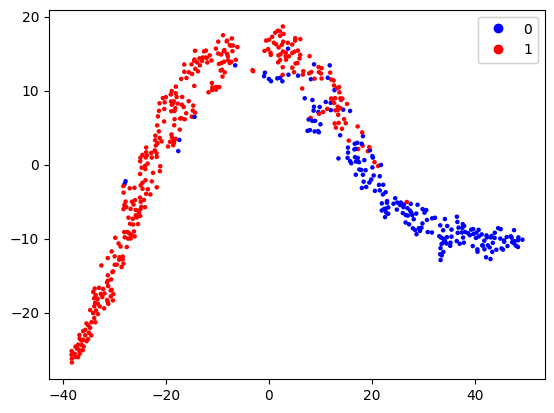

In [123]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print("data shape before: "+str(my_data.data.shape))

my_data_embedded = TSNE().fit_transform(my_data.data)

print("data shape after: "+str(my_data_embedded.shape))

plt.set_cmap('bwr')
fig, ax = plt.subplots()

scatter = ax.scatter(my_data_embedded[:,0],my_data_embedded[:,1],c=my_data.target, s=5)
legend = ax.legend(*scatter.legend_elements(),loc="upper right")
ax.add_artist(legend)

plt.show()
plt.close()



3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [124]:

from sklearn.model_selection import train_test_split

X = pd.DataFrame(my_data.data, columns=my_data.feature_names) # I chose to use this method to define X and Y because I'm more familiar with it.
y = pd.DataFrame(my_data.target, columns=["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42) # I chose random_state=42 in order to be able to compare the same method with different values.

#print(X_train, y_train)
#print(X_test, y_test)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [119]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

model_decision_tree = DecisionTreeClassifier(max_depth=5, splitter='random') # These are not really the best values, but these values ​​will give better results than others at random probability.
model_decision_tree.fit(X_train, y_train)

#plot_tree(model_decision_tree)

DecisionTreeClassifier(max_depth=5, splitter='random')

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [120]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(criterion='entropy') # no matter what values I used for this function's parameters the results were always the same.
model_random_forest.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy')

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [121]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=75, random_state=0)
model_adaboost.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=75, random_state=0)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Evaluation:")
print()

models = {
    'Decision Tree': model_decision_tree,
    'Random Forest': model_random_forest,
    'AdaBoost': model_adaboost
}
max=0
winner="start"
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Model: {name}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score:{precision_score(y_test, y_pred)}")
    model_recall_score=recall_score(y_test, y_pred)
    print(f"Recall Score:{model_recall_score}")
    print(f"F1 Score:{f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    if model_recall_score>max:
        max=model_recall_score
        winner=name
    elif model_recall_score==max:
        winner=winner+" and "+name
    print()

print("These models should be able to spot sick people so I chose to compare them by their \"Recall score\".")
print("The winner is: " + winner)



Evaluation:

Model: Decision Tree
Accuracy Score: 0.98
Precision Score:0.9722222222222222
Recall Score:1.0
F1 Score:0.9859154929577465
Confusion Matrix:
[[14  1]
 [ 0 35]]

Model: Random Forest
Accuracy Score: 0.96
Precision Score:0.9714285714285714
Recall Score:0.9714285714285714
F1 Score:0.9714285714285714
Confusion Matrix:
[[14  1]
 [ 1 34]]

Model: AdaBoost
Accuracy Score: 0.98
Precision Score:0.9722222222222222
Recall Score:1.0
F1 Score:0.9859154929577465
Confusion Matrix:
[[14  1]
 [ 0 35]]

These models should be able to spot sick people so I chose to compare them by their "Recall score".
The winner is: Decision Tree and AdaBoost
